<a href="https://colab.research.google.com/github/asanka2008/test3/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

Monte Carlo results for mass, CoG and comparison plots...


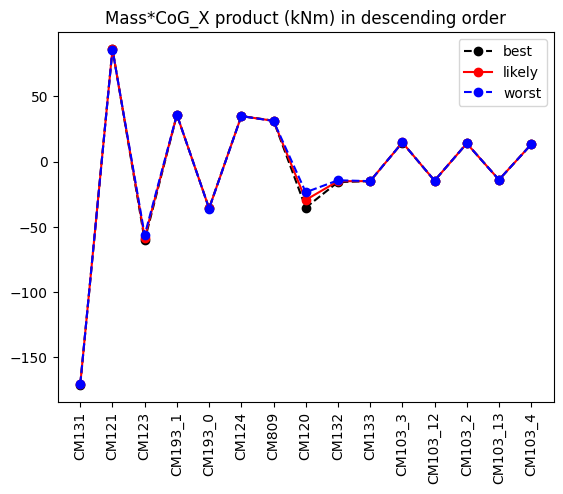

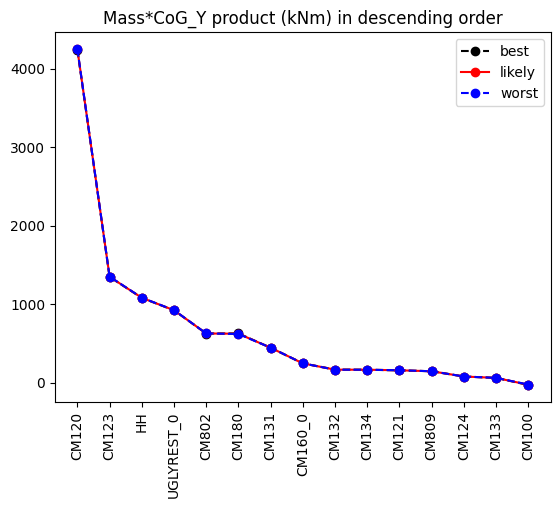

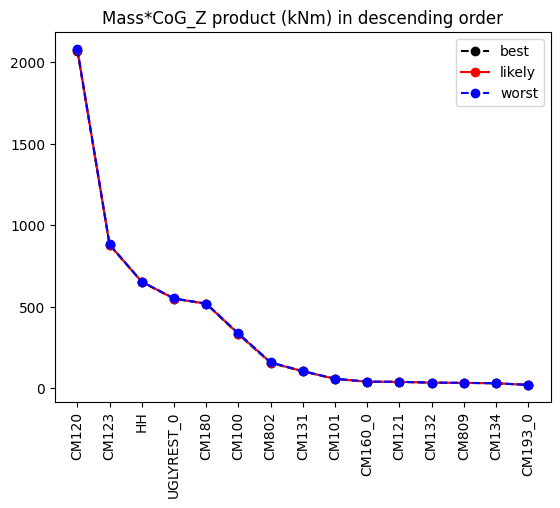

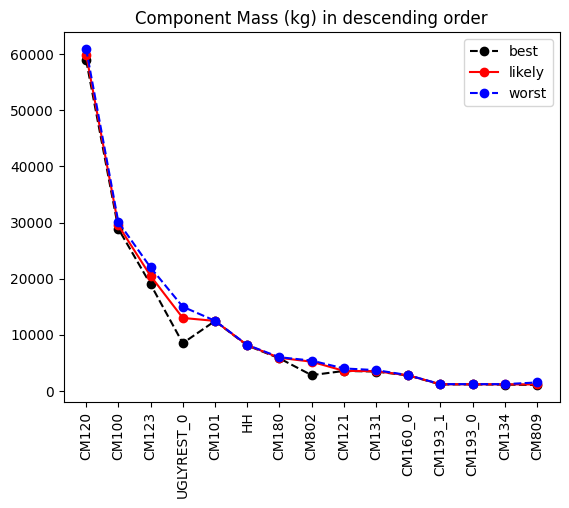

<ipython-input-10-20ade23e0e80>:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EDT.loc[:,x]=Y
<ipython-input-10-20ade23e0e80>:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EDT.loc[:,x]=Y
<ipython-input-10-20ade23e0e80>:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EDT.loc[:,x]=Y
<ipytho

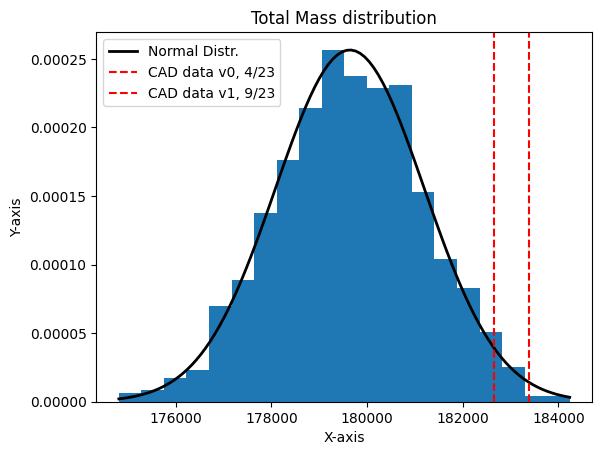

Mean is  179640 , Std Deviation is  1556 and 95% CI is  176591 to  182689


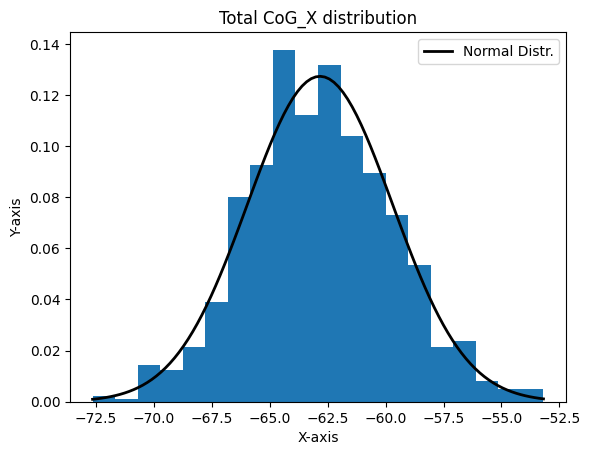

Mean is  -63 , Std Deviation is  3 and 95% CI is  -69 to  -57


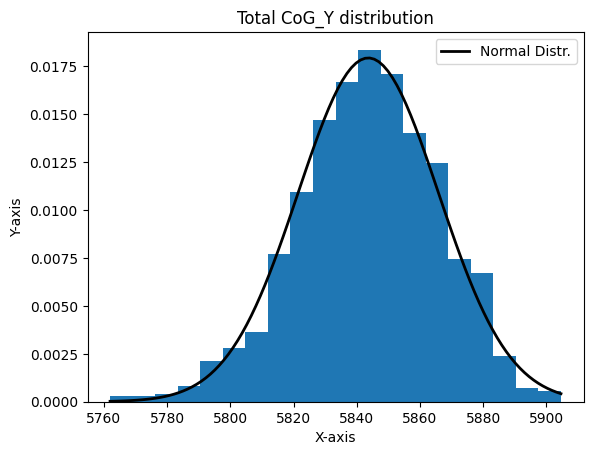

Mean is  5844 , Std Deviation is  22 and 95% CI is  5800 to  5887


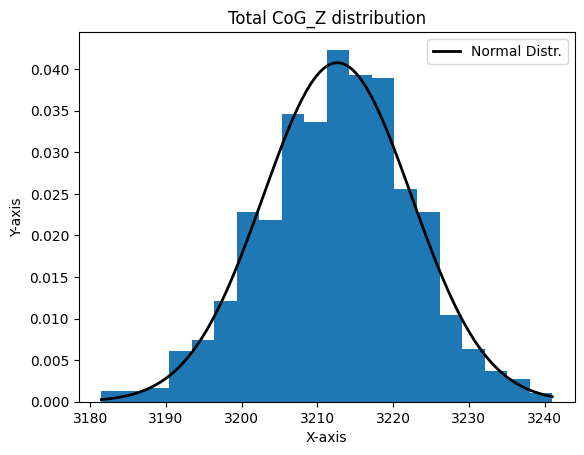

Mean is  3213 , Std Deviation is  10 and 95% CI is  3193 to  3232


In [10]:
print("Monte Carlo results for mass, CoG and comparison plots...")

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
from random import randint

#weight data collection
WeightData = {
                'CM120' : [58950,59950,60950],
     'CM120_X' : [-60,-50,-40],
     'CM120_Y' : [7210,7220,7230],
     'CM120_Z' : [3522,3532,3542],
     'CM100' : [28900,29500,30100],
     'CM100_X' : [5,15,25],
     'CM100_Y' : [-100,-90,-80],
     'CM100_Z' : [1147,1157,1167],
     'CM101' : [12450,12475,12500],
     'CM101_X' : [-10,0,10],
     'CM101_Y' : [-10,0,10],
     'CM101_Z' : [470,480,490],
     'CM103_0' : [480,505,530],
     'CM103_0_X' : [1478.21,1483.615,1489.02],
     'CM103_0_Y' : [-2565.13,-2569.69,-2574.25],
     'CM103_0_Z' : [892,927,962],
     'CM103_1' : [480,505,530],
     'CM103_1_X' : [2360.88,2354.06,2347.24],
     'CM103_1_Y' : [-1804.47,-1806.33,-1808.19],
     'CM103_1_Z' : [892,927,962],
     'CM103_2' : [480,505,530],
     'CM103_2_X' : [2806.82,2813.89,2820.96],
     'CM103_2_Y' : [-941.686,-941.5145,-941.343],
     'CM103_2_Z' : [892,927,962],
     'CM103_3' : [480,505,530],
     'CM103_3_X' : [2945.96,2952.295,2958.63],
     'CM103_3_Y' : [300.415,297.2805,294.146],
     'CM103_3_Z' : [892,927,962],
     'CM103_4' : [480,505,530],
     'CM103_4_X' : [2662.54,2655.47,2648.4],
     'CM103_4_Y' : [1324.14,1323.97,1323.8],
     'CM103_4_Z' : [892,927,962],
     'CM103_5' : [480,505,530],
     'CM103_5_X' : [2129.3,2125.425,2121.55],
     'CM103_5_Y' : [2076.42,2070.505,2064.59],
     'CM103_5_Z' : [892,927,962],
     'CM103_6' : [480,505,530],
     'CM103_6_X' : [1726.95,1723.075,1719.2],
     'CM103_6_Y' : [2421.58,2415.665,2409.75],
     'CM103_6_Z' : [892,927,962],
     'CM103_7' : [480,505,530],
     'CM103_7_X' : [1259.41,1254.005,1248.6],
     'CM103_7_Y' : [2684.66,2689.22,2693.78],
     'CM103_7_Z' : [892,927,962],
     'CM103_8' : [480,505,530],
     'CM103_8_X' : [-1256.35,-1254.005,-1251.66],
     'CM103_8_Y' : [2682.55,2689.22,2695.89],
     'CM103_8_Z' : [892,927,962],
     'CM103_9' : [480,505,530],
     'CM103_9_X' : [-1728.48,-1723.075,-1717.67],
     'CM103_9_Y' : [2420.23,2415.665,2411.1],
     'CM103_9_Z' : [892,927,962],
     'CM103_10' : [480,505,530],
     'CM103_10_X' : [-2118.52,-2125.425,-2132.33],
     'CM103_10_Y' : [2068.98,2070.505,2072.03],
     'CM103_10_Z' : [892,927,962],
     'CM103_11' : [480,505,530],
     'CM103_11_X' : [-2653.13,-2655.47,-2657.81],
     'CM103_11_Y' : [1330.64,1323.97,1317.3],
     'CM103_11_Z' : [892,927,962],
     'CM103_12' : [480,505,530],
     'CM103_12_X' : [-2956.17,-2952.295,-2948.42],
     'CM103_12_Y' : [291.367,297.2805,303.194],
     'CM103_12_Z' : [892,927,962],
     'CM103_13' : [480,505,530],
     'CM103_13_X' : [-2816.23,-2813.89,-2811.55],
     'CM103_13_Y' : [-948.186,-941.5145,-934.843],
     'CM103_13_Z' : [892,927,962],
     'CM103_14' : [480,505,530],
     'CM103_14_X' : [-2351.71,-2354.06,-2356.41],
     'CM103_14_Y' : [-1799.66,-1806.33,-1813],
     'CM103_14_Z' : [892,927,962],
     'CM103_15' : [480,505,530],
     'CM103_15_X' : [-1482.59,-1483.61,-1484.63],
     'CM103_15_Y' : [-2576.69,-2569.695,-2562.7],
     'CM103_15_Z' : [892,927,962],
     'CM131' : [3450,3500,3700],
     'CM131_X' : [-4982,-4972,-4962],
     'CM131_Y' : [12970,12980,12990],
     'CM131_Z' : [3059,3069,3079],
     'CM133' : [430,445,470],
     'CM133_X' : [-3435.5,-3435.5,-3435.45],
     'CM133_Y' : [14087,14092,14097],
     'CM133_Z' : [3094,3099,3104],
     'CM132' : [1130,1140,1150],
     'CM132_X' : [-1407.5,-1345,-1282.5],
     'CM132_Y' : [14970,14867.5,14765],
     'CM132_Z' : [3149,3159,3169],
     'CM809' : [1050,1150,1500],
     'CM809_X' : [2779.5,2769.5,2759.5],
     'CM809_Y' : [12928.5,12938.5,12948.5],
     'CM809_Z' : [2973.5,2983.5,2993.5],
     'CM105_0' : [260,270,280],
     'CM105_0_X' : [-3040,-3035,-3030],
     'CM105_0_Y' : [1515,1510,1505],
     'CM105_0_Z' : [3484,3489,3494],
     'CM126_0' : [140,140,150],
     'CM126_0_X' : [1794,1799,1804],
     'CM126_0_Y' : [12919.4,12914.4,12909.4],
     'CM126_0_Z' : [1617,1619.5,1622],
     'CM145' : [240,240,260],
     'CM145_X' : [3165,3160,3155],
     'CM145_Y' : [6578,6610.5,6643],
     'CM145_Z' : [3307.5,3312.5,3317.5],
     'CM124' : [670,680,685],
     'CM124_X' : [5231,5226,5221],
     'CM124_Y' : [11820,11815,11810],
     'CM124_Z' : [2764,2769,2774],
     'CM121' : [3550,3575,4000],
     'CM121_X' : [2466.5,2456.5,2446.5],
     'CM121_Y' : [4493.83,4503.83,4513.83],
     'CM121_Z' : [1139,1149,1159],
     'CM802' : [2800,5200,5400],
     'CM802_X' : [50.5,0.5,-49.5],
     'CM802_Y' : [12282.5,12292.5,12302.5],
     'CM802_Z' : [3054,3099,3144],
     'CM134' : [1120,1160,1200],
     'CM134_X' : [845.4,855.4,865.4],
     'CM134_Y' : [14522,14532,14542],
     'CM134_Z' : [2779,2789,2799],
     'CM107' : [5,20,20],
     'CM107_X' : [-3167,-3157,-3147],
     'CM107_Y' : [4142,4152,4162],
     'CM107_Z' : [3802,3812,3822],
     'CM135_0' : [10,20,60],
     'CM135_0_X' : [3252,3242,3232],
     'CM135_0_Y' : [5964,5954,5944],
     'CM135_0_Z' : [3293,3303,3313],
     'CM135_1' : [5,10,10],
     'CM135_1_X' : [3267,3262,3257],
     'CM135_1_Y' : [5990,5985,5980],
     'CM135_1_Z' : [3958,3963,3968],
     'CM137' : [5,20,40],
     'CM137_X' : [-3586.11,-3591.11,-3596.11],
     'CM137_Y' : [10845,10850,10855],
     'CM137_Z' : [3723.17,3728.17,3733.17],
     'CM617' : [5,20,20],
     'CM617_X' : [-3360,-3362.5,-3365],
     'CM617_Y' : [12524.7,12527.2,12529.7],
     'CM617_Z' : [3723.9,3721.4,3718.9],
     'CM105_1' : [260,270,280],
     'CM105_1_X' : [3040,3035,3030],
     'CM105_1_Y' : [1435,1440,1445],
     'CM105_1_Z' : [3484,3489,3494],
     'CM160_0' : [2750,2775,2800],
     'CM160_0_X' : [-10,0,10],
     'CM160_0_Y' : [9040,9050,9060],
     'CM160_0_Z' : [1492,1502,1512],
     'CM123' : [19000,20500,22000],
     'CM123_X' : [-300,-290,-280],
     'CM123_Y' : [6700,6710,6720],
     'CM123_Z' : [4372,4382,4392],
     'CM180' : [5800,5900,6000],
     'CM180_X' : [130,140,150],
     'CM180_Y' : [10850,10785,10720],
     'CM180_Z' : [8972,8982,8992],
     'CM193_0' : [1150,1175,1200],
     'CM193_0_X' : [-3106,-3116,-3126],
     'CM193_0_Y' : [200,190,180],
     'CM193_0_Z' : [1817,1827,1837],
     'CM193_1' : [1150,1175,1200],
     'CM193_1_X' : [3106,3116,3126],
     'CM193_1_Y' : [180,190,200],
     'CM193_1_Z' : [1817,1827,1837],
     'CM126_1' : [140,140,150],
     'CM126_1_X' : [-1844,-1839,-1834],
     'CM126_1_Y' : [12919.4,12914.4,12909.4],
     'CM126_1_Z' : [1617,1619.5,1622],
     'HH' : [8100,8150,8200],
     'HH_X' : [-10,0,10],
     'HH_Y' : [13520,13530,13540],
     'HH_Z' : [8170,8180,8190],
     'UGLYREST_0' : [8500,13000,15000],
     'UGLYREST_0_X' : [-60,-50,-40],
     'UGLYREST_0_Y' : [7230,7240,7250],
     'UGLYREST_0_Z' : [4312,4322,4332]
    }

#Entering weight data into DT Data Table
DT=pd.DataFrame(WeightData, index = ['best', 'likely', 'worst'])

# Writing only the mass data to a new data frame
# Get the column indices from the original DataFrame
column_indices = list(range(len(DT.columns)))
MassDT = {}
x = 0

M_X=[]
M_Y=[]
M_Z=[]

while x < len(column_indices):
  if x == 0 or x % 4 == 0:  #if column index is 0 or multiples of 4!
        column_name = DT.columns[x]
        MassDT[column_name] = DT.iloc[:, x]  # Copy the selected column to MassDT
        if x < (len(column_indices)-3):
          likely = DT.iloc[1,x] #likely mass value for column x
          m_x={'best':likely*DT.iloc[0,x+1]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+1]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+1]*9.80665/1000/1000}   #in units of kNm
          M_X.append(m_x)
          m_y={'best':likely*DT.iloc[0,x+2]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+2]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+2]*9.80665/1000/1000}   #in units of kNm
          M_Y.append(m_y)
          m_z={'best':likely*DT.iloc[0,x+3]*9.80665/1000/1000, 'likely':likely*DT.iloc[1,x+3]*9.80665/1000/1000, 'worst':likely*DT.iloc[2,x+3]*9.80665/1000/1000}   #in units of kNm
          M_Z.append(m_z)
  x += 1

# Create a new DataFrame from the collected mass only data
Mass_only_DT = pd.DataFrame(MassDT)
#collect mass column names
column_names=Mass_only_DT.columns

#MY = pd.DataFrame.from_dict(M_Y, orient='index') #why does this not work??
MX=pd.DataFrame.from_dict(M_X)
MXdf=MX.transpose()
MXdf.columns = column_names

MY=pd.DataFrame.from_dict(M_Y)
MYdf=MY.transpose()
MYdf.columns = column_names

MZ=pd.DataFrame.from_dict(M_Z)
MZdf=MZ.transpose()
MZdf.columns = column_names

#To sort the comparison dataframe and plot in descending order
class Comparison_plot:
  def __init__(self, data, name, plot_points):
    self.data=data #this is the data frame
    self.name=name #this is the name of the data being plotted
    self.plot_points=plot_points #this is the limit to the number of points to plot. If 0, then the entire data set to be plot

  def Sort_and_plot(self):
    #plot best, worst, likely values of all component data sorted in descending order
      SortedData=self.data.sort_values(by='likely', axis=1, ascending=False, key=lambda x: abs(x))
      A=len(SortedData.columns)
      if self.plot_points!=0 & self.plot_points < A: #only plot first 'plot_points', unless it is 0 or mistakenly picked larger than number of data points
        SortedData=SortedData.iloc[:,0:self.plot_points]

      plt.xticks(rotation=90)
      plt.title(self.name+' in descending order')
      plt.plot(SortedData.iloc[0,:],'ko--', label='best')
      plt.plot(SortedData.iloc[1,:], 'ro-', label='likely')
      plt.plot(SortedData.iloc[2,:],'bo--', label='worst')
      plt.legend()
      plt.show()

#plot best, worst, likely values of all component weights into CoG_X sorted in descending order
comp_plot=Comparison_plot(MXdf, 'Mass*CoG_X product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights into CoG_Y sorted in descending order
comp_plot=Comparison_plot(MYdf, 'Mass*CoG_Y product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights into CoG_Z sorted in descending order
comp_plot=Comparison_plot(MZdf, 'Mass*CoG_Z product (kNm)',15)
comp_plot.Sort_and_plot()

#plot best, worst, likely values of all component weights sorted in descending order
comp_plot=Comparison_plot(Mass_only_DT, 'Component Mass (kg)',15)
comp_plot.Sort_and_plot()


#Adding Mean, Alpha, Beta and Skewness to the DataTable
#initialize
Mean = []
A = []
B = []
SK=[]

EDT =pd.DataFrame([]) #to extend the data table from 3 points to many points on a distribution

#Input parameters
factor = 4
seeds=100 #number of data points added on the pareto distribution
CI=.95 #Confidence interval for mass and CoG results

for x in range(len(DT.columns)) :
  best = DT.iloc[0,x]
  likely = DT.iloc[1,x]
  worst = DT.iloc[2,x]
  mean = (best+factor*likely + worst)/(2+factor)
  #shape factors a & b
  a = ( 1 + factor*((mean-best)/(worst-best)) )
  b = ( 1 + factor*((worst-mean)/(worst-best)) )
  #skewness
  sk = (2*(b-a)*math.sqrt(a+b+1))/((a+b+2)*math.sqrt(a*b))
  #append, mean, a & b and skewness to arrays
  Mean.append(mean)
  A.append(a)
  B.append(b)
  SK.append(sk)

  #populating values between best and worst based on the pert distribution to a new data table EDT (Extended DataTable), extending the 3 point data in DT
  x1 = np.linspace(0,1, seeds)
  #beta inverse normalized values for x1
  y=beta.ppf(x1,a,b)
  #beta inverse scaled values
  y1=y*(worst-best)/CI+best-(worst-best)*(1-CI)/2
  Y=pd.DataFrame(y1)
  #append Y column to EDT dataframe
  EDT.loc[:,x]=Y

#append, mean, a & b and skewness to DataTable
DT.loc[3,:] = Mean
DT.loc[4,:] = A
DT.loc[5,:] = B
DT.loc[6,:] = SK

DT.index =['best', 'likely', 'worst', 'mean', 'alpha', 'beta', 'skewness']

#plotting the PERT distributions of the individual components based on their three point estimates
#for x in range(len(EDT.columns)) :
  #plt.title('Histogram for {}'.format(DT.columns[x]))
  #plt.hist(EDT[x],10)
  #plt.plot([DT.iloc[0,x],DT.iloc[1,x],DT.iloc[2,x]],[0,0,0],marker='o',ms=20)
  #plt.show()


SM=[] #total sum of mass in HubDT columns
CoGx=[] #Sum of product of Mass and CoG_x
CoGy=[] #Sum of product of Mass and CoG_x
CoGz=[] #Sum of product of Mass and CoG_x

#Initializing
i=0
k=seeds-1 #this can be eliminated?
while i<1000:
  x=0
  sm=0
  sp_mcogx=0
  sp_mcogy=0
  sp_mcogz=0
  while x < len(EDT.columns) :
    m = EDT.iloc[randint(0,k),x] #mass value for x item
    cogx = EDT.iloc[randint(0,k),x+1] #CoG_x value for x item
    cogy = EDT.iloc[randint(0,k),x+2] #CoG_x value for x item
    cogz = EDT.iloc[randint(0,k),x+3] #CoG_x value for x item
    sm+= m #sum of m
    sp_mcogx += m * cogx #sum of product of m and cogx
    sp_mcogy += m * cogy #sum of product of m and cogy
    sp_mcogz += m * cogz #sum of product of m and cogz
    x+=4
  cogx = sp_mcogx / sm #equivalent CoG_X value
  cogy = sp_mcogy / sm #equivalent CoG_Y value
  cogz = sp_mcogz / sm #equivalent CoG_Z value
  SM.insert(i,sm)
  CoGx.insert(i,cogx)
  CoGy.insert(i,cogy)
  CoGz.insert(i,cogz)
  i+=1


#class definition to print histogram and to fit a normal distribution to it
class Histograms:
  def __init__(self,x,y,y1,z):
    self.x=x #this is the data set
    self.y=y # this is the verification data
    self.y1=y1 # this is the verification data
    self.z=z # this is the validation data

  def print_hist(self):
    #create histogram
    plt.hist(self.x,bins=20, density=True)
    #fit a normal distribution
    mu, std=norm.fit(self.x)
    #plot normal distribution to histogram
    xmin = min(self.x)
    xmax = max(self.x)
    x2 = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x2, mu, std)
    plt.plot(x2, p, 'k', linewidth=2, label='Normal Distr.')

    #plotting vertical lines showing verification and validation on top of the histogram, when they are present
    if self.y != 0 :
      plt.axvline(x=self.y, color='r', linestyle='--', label='CAD data v0, 4/23')
    if self.y1 != 0 :
      plt.axvline(x=self.y1, color='r', linestyle='--', label='CAD data v1, 9/23')
    if self.z !=0 :
      plt.axvline(x=self.z, color='r', linestyle='-', label='Measured data')

    # Add labels and a legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    #print: mean, std and 95% confidence interval
    print('Mean is ', round(mu), ', Std Deviation is ', round(std), 'and 95% CI is ', round(mu-std*1.96), 'to ', round(mu+std*1.96))

plt.title('Total Mass distribution')
Hist=Histograms(SM,183378,182647,0)
Hist.print_hist()

plt.title('Total CoG_X distribution')
Hist=Histograms(CoGx,0,0,0)
Hist.print_hist()

plt.title('Total CoG_Y distribution')
Hist=Histograms(CoGy,0,0,0)
Hist.print_hist()

plt.title('Total CoG_Z distribution')
Hist=Histograms(CoGz,0,0,0)
Hist.print_hist()



